<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Tugas1/Classification%20HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
# Install mglearn if not installed
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.6 MB/s eta 0:00:00


In [18]:
# Upload file
from google.colab import files
uploaded = files.upload()

# Membaca Dataset
df = pd.read_csv(list(uploaded.keys())[0])

# Print dataset column
print("Dataset Columns:")
print(df.columns)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check nilai yang hilang
df.dropna(inplace=True)

# Mengidentifikasi Variable
target_column = "num"  # Sesuaikan dengan nama kolom yang benar dari dataset
if target_column not in df.columns:
    raise KeyError(f"Target variable '{target_column}' not found in dataset.")
y = df[target_column]

# Mengubah Target
if len(y.unique()) > 2:
    print("Target variable has multiple classes, converting to binary classification.")
    y = (y > 1).astype(int)  # Modify as needed for specific threshold


selected_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
existing_features = [feature for feature in selected_features if feature in df.columns]

if not existing_features:
    raise KeyError("None of the selected features exist in the dataset. Check column names.")

X = df[existing_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluasi Matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Saving HeartDisease.csv to HeartDisease (5).csv
Dataset Columns:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Target variable has multiple classes, converting to binary classification.
Accuracy: 0.85
Precision: 0.8125
Recall: 0.7666666666666666
F1 Score: 0.7849462365591398
ROC AUC: 0.9066666666666666



Mathematical Explanation:
1. Logistic Regression Model: P(Y=1) = 1 / (1 + exp(- (wX + b)))
2. Accuracy: (TP + TN) / (TP + TN + FP + FN)
3. Precision: TP / (TP + FP)
4. Recall: TP / (TP + FN)
5. F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
6. ROC AUC: Area under the ROC Curve


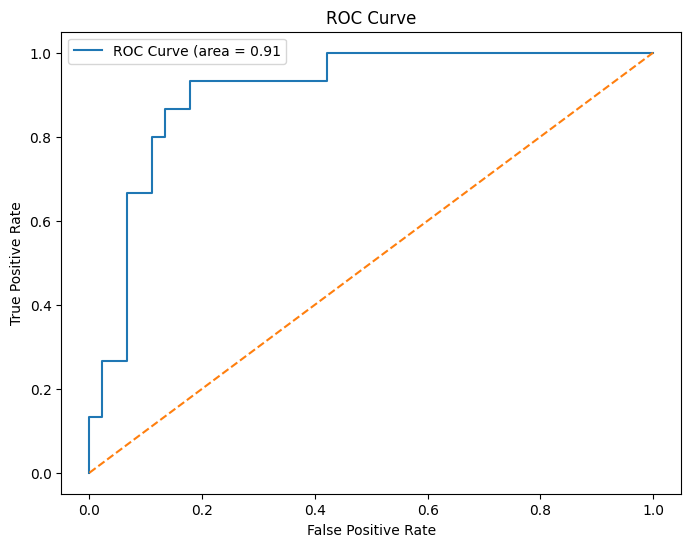

In [19]:
# Penjelasan Persamaan Matematika
print("\nMathematical Explanation:")
print("1. Logistic Regression Model: P(Y=1) = 1 / (1 + exp(- (wX + b)))")
print("2. Accuracy: (TP + TN) / (TP + TN + FP + FN)")
print("3. Precision: TP / (TP + FP)")
print("4. Recall: TP / (TP + FN)")
print("5. F1 Score: 2 * (Precision * Recall) / (Precision + Recall)")
print("6. ROC AUC: Area under the ROC Curve")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


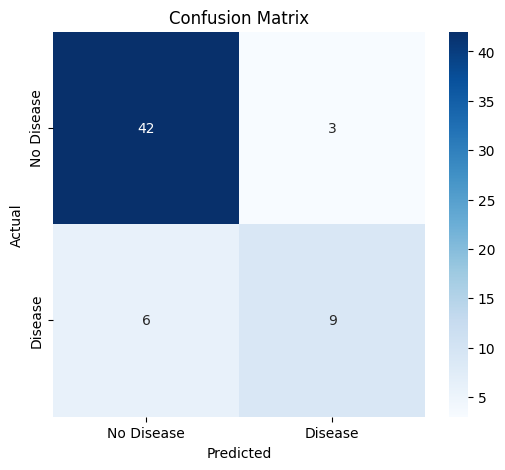

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()